In [45]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect('../data/poe_races.db')

In [3]:
c = conn.cursor()

Let's see how many character (a.k.a. toon) records over all the different ladders there are.

In [4]:
c.execute('''
          SELECT COUNT(*) FROM ladders;
          ''')
c.fetchall()

[(5140057,)]

And how many leagues do we have?

In [5]:
c.execute('''
          SELECT COUNT(*) FROM leagues;
          ''')
c.fetchall()

[(5222,)]

What information do we have for each character?

In [6]:
c.execute('''
          PRAGMA table_info(ladders); 
          ''')
c.fetchall()

[(0, 'id', 'text', 0, None, 0),
 (1, 'account', 'text', 0, None, 0),
 (2, 'twitch', 'text', 0, None, 0),
 (3, 'challenges', 'integer', 0, None, 0),
 (4, 'character', 'text', 0, None, 0),
 (5, 'rank', 'integer', 0, None, 0),
 (6, 'class', 'text', 0, None, 0),
 (7, 'experience', 'integer', 0, None, 0),
 (8, 'dead', 'integer', 0, None, 0)]

Let's get the league ids and the number of toons for each.

In [7]:
league_ids = pd.read_sql_query('''
                                SELECT id, COUNT(*) FROM ladders
                                GROUP BY id;
                                ''',
                                conn)
league_ids.rename(columns={'COUNT(*)':'count'}, inplace=True)

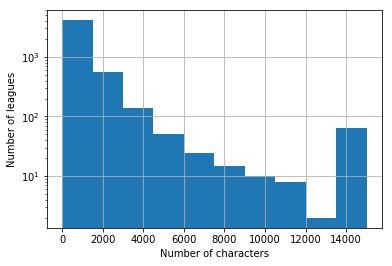

In [8]:
%matplotlib inline
league_ids['count'].hist()
plt.ylabel('Number of leagues')
plt.xlabel('Number of characters')
plt.yscale('log')
#plt.savefig('../figures/league_size_log_hist.png', dpi=300)

Almost all the leagues have less than 2,500 toons on the ladder. The bump at 15000 is because that is the max depth of the ladder that the Path of Exile API allows you to retrieve.

In [9]:
list(league_ids[league_ids['count'] == 15000]['id'])

['1 Month Flashback (IC006)',
 '1 Month Flashback HC (IC007)',
 '1 Week Nemesis (S06W069)',
 '2 Week Charity Event',
 '3 Day Exiles Event HC (IC010)',
 '5 Day Solo Hardcore (IV002)',
 'Ambush',
 'Anarchy',
 'Beyond',
 'Bloodlines',
 'Breach',
 'Darkshrine (IC003)',
 'Darkshrine HC (IC004)',
 'Domination',
 'Essence',
 'Flashback Event (IC001)',
 'Flashback Event HC (IC002)',
 'Hardcore',
 'Hardcore Breach',
 'Hardcore Essence',
 'Hardcore Perandus',
 'Hardcore Prophecy',
 'Hardcore Talisman',
 'Headhunter (FRW001)',
 'Invasion',
 'Nemesis',
 'Nemesis One Week Race',
 'One Month Race',
 'One Month Race HC',
 'One Week HC Rampage/Beyond',
 'One Week Rampage/Beyond',
 'Onslaught',
 'Perandus',
 'Perandus Flashback',
 'Perandus Flashback HC',
 'Prophecy',
 'Rampage',
 'SG_Ambush',
 'SG_Hardcore',
 'SG_Rampage',
 'SG_Standard',
 'SG_Warbands',
 'Standard',
 'Talisman',
 'Tempest',
 'Torment',
 'Torment/Bloodlines',
 'Torment/Bloodlines HC',
 'Void',
 'Warbands',
 'Буря',
 'Одна жизнь',
 'От

As you might expect, most of these are season long leagues that take place over months. There are few shorter leagues, though. 

The '3 Day Exiles Event HC (IC010)' was an in between season event that awarded closed beta access to the next expansion for the top 200 players. Additionally exile everywhere races are especially unique, deadly (racers likely ended up having multiple toons), and entertaining :-D. In exiles everywhere, 20 rogue exiles (mini-bosses) spawn _per zone_. You can check out the [forum post](http://www.pathofexile.com/forum/view-thread/1293370) or ZiggyD [racing this event](https://www.youtube.com/watch?v=t3TBU_Kwbes) to see just how brutal these races are.

In fact, let's look at the experience distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1159e6eb8>]], dtype=object)

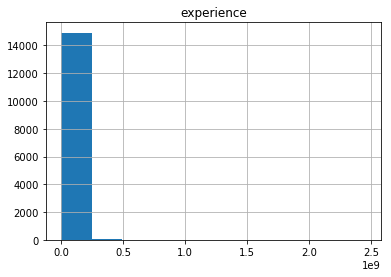

In [10]:
exiles_race = pd.read_sql_query('''
                                SELECT experience FROM ladders
                                WHERE id="3 Day Exiles Event HC (IC010)"
                                ''',
                                conn)
exiles_race.hist()

So... nearly everyone dies immediately with a few players able to get a good run going.

Can we predict how brutal a race is going to be based on its rules?

In [11]:
league_ids['id'][10]

'1 Hour Ancestral Solo (S1E98)'

In [12]:
def make_hist(id):
    race_experience = pd.read_sql_query('''
                                        SELECT experience FROM ladders
                                        WHERE id="{0}";
                                        '''.format(id),
                                        conn)
    race_experience.hist()

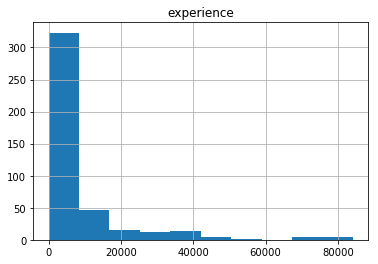

In [13]:
make_hist(league_ids['id'][13])

## Time series analysis

Read the whole leagues table into a pandas data frame so it's easier to work with.

In [14]:
leagues_df = pd.read_sql('SELECT * FROM leagues;', conn)

In [15]:
leagues_df.index = leagues_df['id']

Let's convert the start and end times to pandas datetime objects.

In [16]:
leagues_df['startAt'] = pd.to_datetime(leagues_df['startAt'], errors='coerce')
leagues_df['endAt'] = pd.to_datetime(leagues_df['endAt'], errors='coerce')

Now we can see how many events there have been over time.

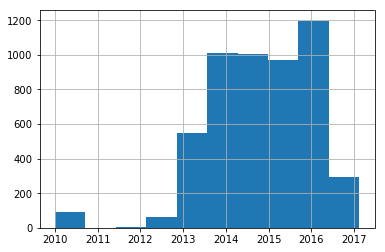

In [17]:
leagues_df['startAt'].hist()

Hmm, what's that bump around 2010?

In [18]:
leagues_df[leagues_df['startAt'] < '2011']

,id,description,startAt,endAt,registerAt,url,rules,event
id,,,,,,,,
RU_Disabled 735,RU_Disabled 735,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 736,RU_Disabled 736,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 737,RU_Disabled 737,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 738,RU_Disabled 738,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 739,RU_Disabled 739,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 740,RU_Disabled 740,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 741,RU_Disabled 741,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 742,RU_Disabled 742,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 743,RU_Disabled 743,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1


All of these RU_Disabled leagues are from when there was a Russian version of Path of Exile on Garena Russia's servers. It operated from mid-2015 to mid-2016 at which point Garena Russia closed and all accounts where transfered to European servers operated by Grinding Gear Games. Here is the [announcement forum post](https://www.pathofexile.com/forum/view-thread/1204892) and [closure post](https://www.pathofexile.com/forum/view-thread/1705330) for the Garena Russia servers.

Somehow all the times got defaulted to 11AM December 31st, 2009 during the migration :\. For our time series analysis we'll be dropping these mislabeled leagues. 

In [19]:
leagues_df = leagues_df[leagues_df['startAt'] > '2010']

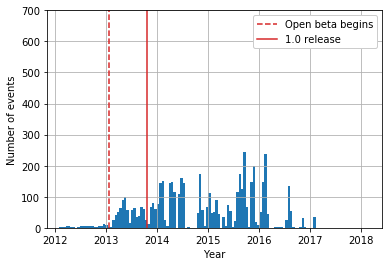

In [20]:
leagues_df['startAt'].hist(bins=110)
plt.axvline(x=pd.to_datetime('2013-01-23'), color='C3', linestyle='--', label='Open beta begins')
plt.axvline(x=pd.to_datetime('2013-10-23'), color='C3', linestyle='-', label='1.0 release')
plt.legend(loc=1, framealpha=1)
plt.ylim([0,700])
plt.xlim([734450,736850])
plt.ylabel('Number of events')
plt.xlabel('Year')
#plt.savefig('../figures/poe_events_over_time.png', dpi=300)

In [21]:
ladders_df = pd.read_sql('SELECT * FROM ladders;', conn)

Let's look at how popular the different classes have been over time

In [22]:
ladders_df['class'].unique()

array(['Duelist', 'Marauder', 'Witch', 'Templar', 'Shadow', 'Ranger',
       'Scion', 'Elementalist', 'Guardian', 'Slayer', 'Pathfinder',
       'Saboteur', 'Berserker', 'Hierophant', 'Chieftain', 'Champion',
       'Assassin', 'Gladiator', 'Inquisitor', 'Necromancer', 'Occultist',
       'Juggernaut', 'Trickster', 'Ascendant', 'Deadeye', 'Raider'], dtype=object)

In Path of Exile there are 7 basic classes ('Duelist', 'Marauder', 'Witch', 'Templar', 'Shadow', 'Ranger', 'Scion') and 19 subclasses ('Elementalist', 'Guardian', 'Slayer', 'Pathfinder', 'Saboteur', 'Berserker', 'Hierophant', 'Chieftain', 'Champion', 'Assassin', 'Gladiator', 'Inquisitor', 'Necromancer', 'Occultist', 'Juggernaut', 'Trickster', 'Ascendant', 'Deadeye', 'Raider'). 

Let's first look at how the popularity of just the 7 basic classes have changed over time.

In [23]:
class_to_subclasses = {'Duelist': ['Slayer','Gladiator', 'Champion'],
                       'Marauder': ['Juggernaut', 'Berserker', 'Chieftain'],
                       'Witch': ['Necromancer', 'Occultist', 'Elementalist'],
                       'Templar': ['Inquisitor', 'Heirophant', 'Guardian'],
                       'Shadow': ['Assassin', 'Saboteur', 'Trickster'],
                       'Ranger': ['Deadeye', 'Raider', 'Pathfinder'],
                       'Scion': ['Ascendant']
                      }

In [24]:
counts_dfs ={}
for class_name in class_to_subclasses:
    # DF with just characters of a certain base class
    df = ladders_df[ladders_df['class'].isin(class_to_subclasses[class_name] + [class_name])]
    
    counts_dfs[class_name.lower() + '_count'] = df.groupby('id').size()

It would also be nice to keep track of the total number of characters in a league.

In [25]:
counts_dfs['character_count'] = ladders_df.groupby(['id']).size()

Let's merge these into a single dataframe.

In [26]:
all_counts_df = pd.DataFrame(counts_dfs).fillna(0)

In [27]:
all_counts_df

,character_count,duelist_count,marauder_count,ranger_count,scion_count,shadow_count,templar_count,witch_count
1 Hour AI Party (S04F131),546,110.0,68.0,107.0,0.0,99.0,80.0,82.0
1 Hour Ancestral EL (S04F050),1153,253.0,159.0,235.0,0.0,155.0,209.0,142.0
1 Hour Ancestral Party (S06F026),1808,237.0,246.0,230.0,622.0,169.0,133.0,171.0
1 Hour Ancestral Party (S07C006),2840,326.0,408.0,423.0,556.0,391.0,314.0,422.0
1 Hour Ancestral Solo (S08C046),1770,201.0,242.0,217.0,315.0,264.0,216.0,315.0
1 Hour Ancestral Solo (S08C084),921,117.0,113.0,98.0,125.0,155.0,132.0,181.0
1 Hour Ancestral Solo (S08C159),571,80.0,81.0,59.0,109.0,82.0,70.0,90.0
1 Hour Ancestral Solo (S1E100),477,72.0,58.0,82.0,0.0,95.0,90.0,80.0
1 Hour Ancestral Solo (S1E51),2201,474.0,395.0,357.0,0.0,376.0,300.0,299.0
1 Hour Ancestral Solo (S1E52),1389,268.0,251.0,219.0,0.0,236.0,213.0,202.0


In [28]:
leagues_df = leagues_df.join(all_counts_df)

In [29]:
leagues_df

,id,description,startAt,endAt,registerAt,url,rules,event,character_count,duelist_count,marauder_count,ranger_count,scion_count,shadow_count,templar_count,witch_count
id,,,,,,,,,,,,,,,,
Standard,Standard,The default game mode.,2013-01-23 21:00:00,NaT,None,http://pathofexile.com/forum/view-thread/71278,[],0,15000.0,1252.0,2036.0,3332.0,1989.0,2024.0,939.0,3345.0
Hardcore,Hardcore,A character killed in the Hardcore league is m...,2013-01-23 21:00:00,NaT,None,http://pathofexile.com/forum/view-thread/71276,[{u'description': u'A character killed in Hard...,0,15000.0,2208.0,2645.0,1857.0,2134.0,1757.0,1277.0,2988.0
Jan30 3h Rush HC,Jan30 3h Rush HC,A 3 hour hardcore ladder rush with prizes. See...,2012-01-29 21:00:00,2012-01-30 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feb13 HC Unique Rush,Feb13 HC Unique Rush,A 3 hour hardcore ladder rush with unique priz...,2012-02-12 21:00:00,2012-02-13 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A6 LAN Event,A6 LAN Event,A private league for the A6 LAN tournament. Re...,2012-02-18 07:00:03,2012-02-18 08:30:03,None,None,[{u'description': u'League requires a password...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feb26 HC Ladder Rush,Feb26 HC Ladder Rush,A 3 hour hardcore ladder rush with prizes. See...,2012-02-25 21:00:00,2012-02-26 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mar4 HC Ladder Rush,Mar4 HC Ladder Rush,A 3 hour hardcore ladder rush with prizes. See...,2012-03-03 21:00:00,2012-03-04 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mar11 HC Ladder Rush,Mar11 HC Ladder Rush,A 3 hour ladder rush with prizes. See the foru...,2012-03-10 21:00:00,2012-03-11 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mar18 HC Ladder Rush,Mar18 HC Ladder Rush,A 3 hour ladder rush with prizes. See the foru...,2012-03-17 21:00:00,2012-03-18 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
leagues_df.isnull().sum()

id                   0
description          0
startAt              0
endAt                3
registerAt           0
url                  0
rules                0
event                0
character_count    142
duelist_count      142
marauder_count     142
ranger_count       142
scion_count        142
shadow_count       142
templar_count      142
witch_count        142
dtype: int64

Several of these races didn't have ladders with racers (they were private or otherwise scrubbed).

We can see there are 142 of these 'empty' races.

In [31]:
for class_name in class_to_subclasses:
    cname = class_name.lower()
    leagues_df[cname + '_ratio'] = leagues_df[cname + '_count']/leagues_df['character_count']

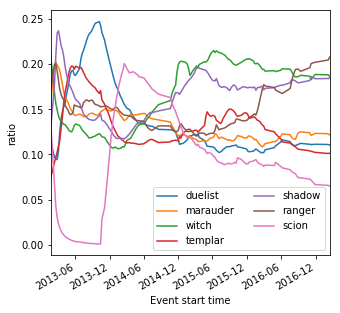

In [34]:
plt.figure(figsize=(5, 5), facecolor='w', edgecolor='k')
for class_name in class_to_subclasses:
    cname = class_name.lower()
    time_series = pd.Series(leagues_df[cname + '_ratio'].values, index=leagues_df['startAt'])
    time_series.resample('7D').median().dropna().ewm(span=25).mean().plot(label=cname)

plt.ylabel('ratio')
plt.xlabel('Event start time')
plt.legend(ncol=2)
plt.show()

There is a bump for scion at the beginning because we are including the open-ended leagues ('Standard', 'Hardcore', etc.). Let's drop those so we can accurately capture when scion came into the mix.

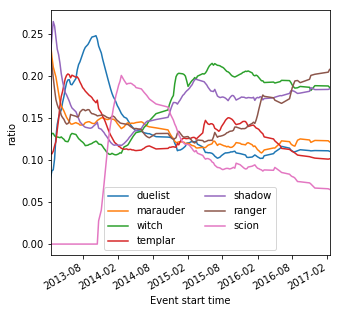

In [35]:
closed_ended_leagues = leagues_df[leagues_df['endAt'] < '2018']

plt.figure(figsize=(5, 5), facecolor='w', edgecolor='k')
for class_name in class_to_subclasses:
    cname = class_name.lower()
    time_series = pd.Series(closed_ended_leagues[cname + '_ratio'].values, index=closed_ended_leagues['startAt'])
    time_series.resample('7D').median().dropna().ewm(span=25).mean().plot(label=cname)

plt.ylabel('ratio')
plt.xlabel('Event start time')
plt.legend(ncol=2)
#plt.savefig('../figures/poe_class_popularity_vs_time.png', dpi=300)
plt.show()

For fun let's look at a stacked area chart of the ratios.

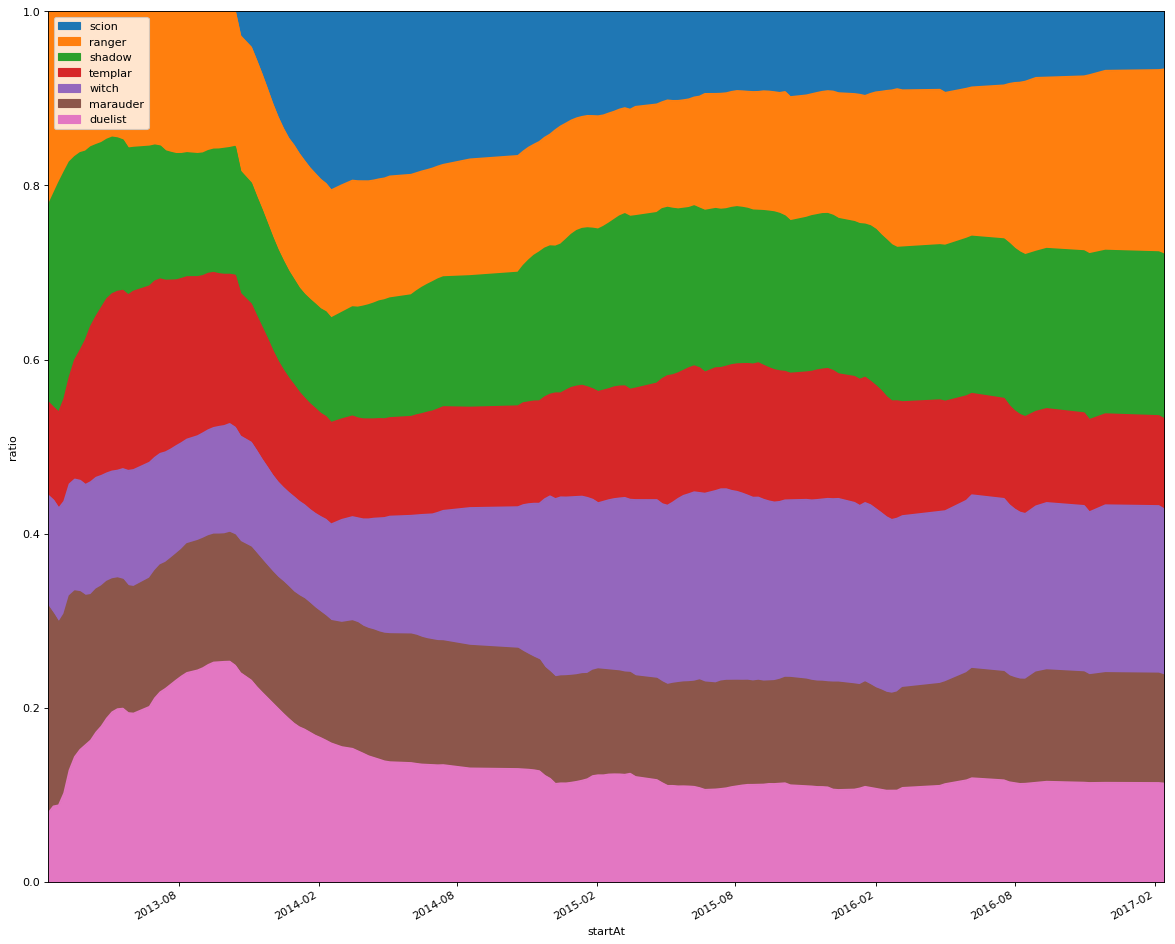

In [36]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

closed_ended_leagues = leagues_df[leagues_df['endAt'] < '2018']

sum_ratios = 0
for class_name in class_to_subclasses:
    cname = class_name.lower()
    time_series = pd.Series(closed_ended_leagues[cname + '_ratio'].values, index=closed_ended_leagues['startAt'])
    sum_ratios += (time_series.resample('7D').median().dropna().ewm(span=25).mean())

first = pd.Series(closed_ended_leagues['duelist' + '_ratio'].values, index=closed_ended_leagues['startAt'])
fist = (time_series.resample('7D').median().dropna().ewm(span=25).mean())/sum_ratios
last = 0

smoothed_series = []
for i, class_name in enumerate(class_to_subclasses):
    cname = class_name.lower()
    time_series = pd.Series(closed_ended_leagues[cname + '_ratio'].values, index=closed_ended_leagues['startAt'])
    smoothed_series.append([cname, time_series.resample('7D').median().dropna().ewm(span=25).mean()/sum_ratios + last])
    last = (time_series.resample('7D').median().dropna().ewm(span=25).mean()/sum_ratios + last)

for cname,series in smoothed_series[::-1]:
    series.plot.area(label=cname)

plt.ylabel('ratio')
plt.ylim([0,1])
plt.legend()
plt.show()

### Track wins by class over time

This adds a column of the winning class for a league

In [37]:
# TODO: I need to merge the class names again...

winning_classes_df = ladders_df[ladders_df['rank'] == 1]
winning_classes = pd.Series(winning_classes_df['class'].values, 
                            index=winning_classes_df['id'].values, 
                            name="winning_classes")
leagues_df = leagues_df.join(winning_classes)

In [38]:
winning_classes_df.groupby('class').count()

,id,account,twitch,challenges,character,rank,experience,dead
class,,,,,,,,
Assassin,3,3,3,3,3,3,3,3
Berserker,1,1,1,1,1,1,0,1
Champion,6,6,6,6,6,6,6,6
Deadeye,1,1,1,1,1,1,1,1
Duelist,651,651,651,651,651,651,595,651
Elementalist,5,5,5,5,5,5,5,5
Gladiator,1,1,1,1,1,1,1,1
Guardian,1,1,1,1,1,1,1,1
Inquisitor,1,1,1,1,1,1,1,1


## Tracking players

First let's look at the players with the most first place finishes.

In [39]:
num_first_place = ladders_df[ladders_df['rank'] == 1].groupby('account')['id'].count().sort_values(ascending=False)
print(num_first_place)

account
cyfer.russia          246
Helman                224
Krame_                146
Throzz                128
Goratha                98
Dsfarblarwaggle        91
cwu                    89
St.Aphrodite           82
lPeeps                 80
grindis123             79
cyfer.russia.II        74
boof                   65
JMCLUB                 62
Krippers               60
ZoRoXo                 58
ToS2                   57
Morsexier              53
Rithz                  52
janimauk               52
Pam                    47
Karvarousku            47
Hybriis                46
RaizQT                 45
Dai_baka               45
FrAgGy                 43
DarylWSJ               43
cyfer.russia.3         41
Condemned              40
Valkyss                40
hayatiiii              38
                     ... 
Redhill                 1
neverhundred            1
Phantasm_TW             1
irihon44                1
Pe4_ka                  1
Path_of_DerroK          1
oretubaftw              1
NoeN

The number of players with a first place finish is:

In [40]:
num_first_place.count()

807

Players with the most races

In [41]:
# nunique counts the number of unique ids (a.k.a. races) for each racer
# in case a racer had multiple characters in a given race
ladders_df.groupby('account')['id'].nunique().sort_values(ascending=False)

account
tpc2084                1669
bazoungus              1605
Morsexier              1523
Whirlwarian            1505
slably                 1488
Helman                 1451
4EverLost              1358
tagpt                  1328
Fightgarr              1316
Trekker720             1260
shashk0                1224
passofexhale           1216
Astrophys              1201
pouu                   1185
Deviruchi27            1172
grindis123             1145
boof                   1100
kefirhl                1091
cobaIt                 1081
Rithz                  1051
ChronoExile            1048
mallow                 1029
bluechipps             1028
jstq                   1007
Goratha                 993
Johnny_Annihilation     990
Warlock279              984
Robit                   952
Ireneusz                949
lPeeps                  926
                       ... 
alo3886                   1
alo_yoba_eto_ti           1
aloco1910                 1
alodia                    1
aloeus      

In [42]:
def get_player_ranks(player):
    ''' For a given player account return a DataFrame of their
        best result for each race they competed in.
    '''
    races = ladders_df[ladders_df['account'] == player]
    return pd.DataFrame(races.groupby('id')['rank'].min())

In [43]:
def print_rank_breakdown(rank_df):
    ''' Print out how often a player finishes in first, the top 10, 
        and the top 100 given a DataFrame of the players rank in
        each event they competed in.
    '''
    print("First place: ", (rank_df[rank_df['rank'] == 1].count()/rank_df.count()).values[0])
    print("Top 10: ", (1 - rank_df[rank_df['rank'] > 10].count()/rank_df.count()).values[0])
    print("Top 100: ", (1 - rank_df[rank_df['rank'] > 100].count()/rank_df.count()).values[0])
    print("Total events: ", (rank_df.count()).values[0])

Add race seasons to the leagues dataframe

In [44]:
# Seasons start at midnight New Zealand time (12pm previous day UTC). 
# Season dates taken from http://pathofexile.gamepedia.com/Races.
season_names = {1:'Season 1',
                2:'Season 2',
                3:'Season 3',
                4:'Season 4',
                5:'Season 5',
                6:'Season 6',
                7:'Season 7',
                8:'Season 8',
                9:'Season 9',
                10:'Season 10',
                11:'Season 11',
                12:'Emberwake',
                13:'Bloodgrip',
                14:'Soulthirst',
                15:'Winterheart',
                16:'Medallion',
                
               }
season_times = {1: {'startAt': pd.Timestamp('2013-02-22T12:00:00Z'), 
                             'endAt': pd.Timestamp('2013-04-06T12:00:00Z')},
                2: {'startAt': pd.Timestamp('2013-04-19T12:00:00Z'), 
                             'endAt': pd.Timestamp('2013-06-05T12:00:00Z')},
                3: {'startAt': pd.Timestamp('2013-06-28T12:00:00Z'), 
                             'endAt': pd.Timestamp('2013-08-10T12:00:00Z')},
                4: {'startAt': pd.Timestamp('2013-08-30T12:00:00Z'), 
                             'endAt': pd.Timestamp('2013-10-12T12:00:00Z')},
                5: {'startAt': pd.Timestamp('2013-11-15T12:00:00Z'), 
                             'endAt': pd.Timestamp('2013-12-28T12:00:00Z')},
                6: {'startAt': pd.Timestamp('2014-01-10T12:00:00Z'), 
                             'endAt': pd.Timestamp('2014-02-22T12:00:00Z')},
                7: {'startAt': pd.Timestamp('2014-03-28T12:00:00Z'), 
                             'endAt': pd.Timestamp('2014-05-10T12:00:00Z')},
                8: {'startAt': pd.Timestamp('2014-06-06T12:00:00Z'), 
                             'endAt': pd.Timestamp('2014-07-19T12:00:00Z')},
                9: {'startAt': pd.Timestamp('2014-10-24T12:00:00Z'), 
                             'endAt': pd.Timestamp('2014-11-20T12:00:00Z')},
                10: {'startAt': pd.Timestamp('2014-12-22T12:00:00Z'), 
                             'endAt': pd.Timestamp('2015-01-18T12:00:00Z')},
                11: {'startAt': pd.Timestamp('2015-02-14T12:00:00Z'), 
                             'endAt': pd.Timestamp('2015-03-13T12:00:00Z')},
                12: {'startAt': pd.Timestamp('2015-07-23T12:00:00Z'), 
                             'endAt': pd.Timestamp('2015-08-19T12:00:00Z')},
                13: {'startAt': pd.Timestamp('2015-09-03T12:00:00Z'), 
                             'endAt': pd.Timestamp('2015-09-30T12:00:00Z')},
                14: {'startAt': pd.Timestamp('2015-11-05T12:00:00Z'), 
                             'endAt': pd.Timestamp('2015-12-02T12:00:00Z')},
                15: {'startAt': pd.Timestamp('2016-01-28T12:00:00Z'), 
                             'endAt': pd.Timestamp('2016-02-24T12:00:00Z')},
                16: {'startAt': pd.Timestamp('2016-07-22T12:00:00Z'), 
                             'endAt': pd.Timestamp('2016-08-18T12:00:00Z')}
               }

In [46]:
leagues_df['season'] = np.nan
for season in season_times:
    leagues_df.loc[(leagues_df['startAt'] >= season_times[season]['startAt']) & 
                   (leagues_df['endAt'] <= season_times[season]['endAt']), 
                   'season'] = season

Visualize consistency of different players

In [47]:
from matplotlib.ticker import FormatStrFormatter

def visualize_player_consistency(player, ranks, save=False):
    ax = ranks.join(leagues_df[['id','season']]).boxplot(column='rank', by='season', showfliers=True)
    plt.title(player + ' race results')
    plt.suptitle('')
    plt.ylabel('Rank')
    plt.xlabel('Season')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    plt.yscale('log')
    plt.ylim([0,10000])
    if save:
        plt.savefig('../figures/poe_' + player.lower() + '_consistency.png', dpi=300)

In [48]:
def visualize_scatter_ranks(player, ranks):
    ranks.join(leagues_df[['id','startAt']]).dropna().plot('startAt', 'rank', style='.')
    plt.legend().remove()
    plt.ylabel('Rank')
    plt.xlabel('Event start time')
    plt.title(player + ' race results')
    plt.yscale('log')
    plt.ylim([0,10000])

--------------------
cyfer


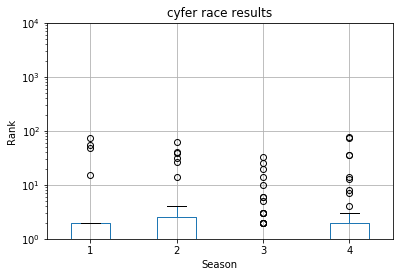

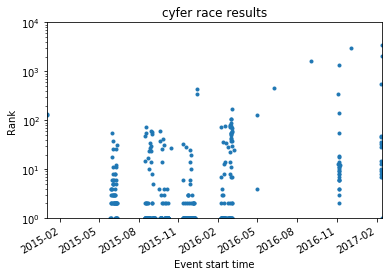

First place:  0.543046357616
Top 10:  0.78587196468
Top 100:  0.962472406181
Total events:  453
--------------------
Helman


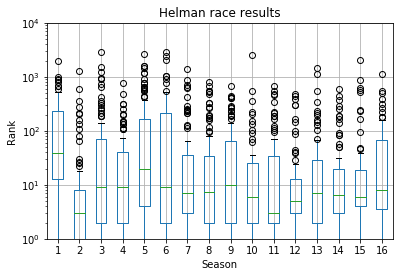

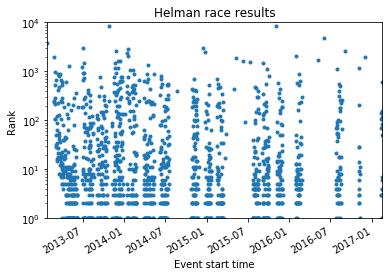

First place:  0.154376292212
Top 10:  0.557546519642
Top 100:  0.802894555479
Total events:  1451
--------------------
Kripp


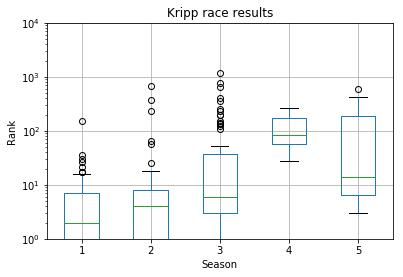

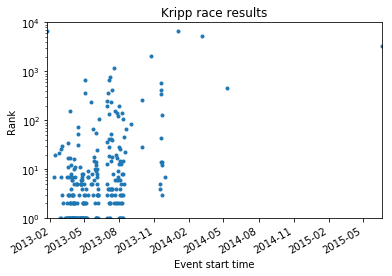

First place:  0.23166023166
Top 10:  0.69111969112
Top 100:  0.880308880309
Total events:  259
--------------------
Steelmage


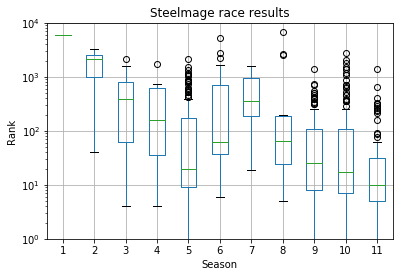

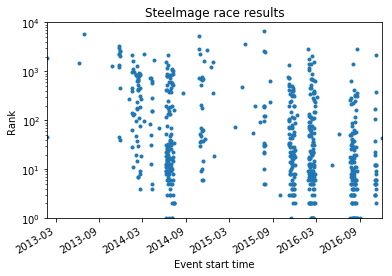

First place:  0.033386327504
Top 10:  0.314785373609
Top 100:  0.669316375199
Total events:  629
--------------------
ZiggyD


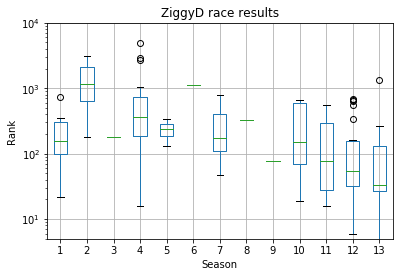

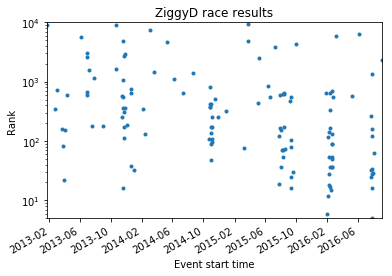

First place:  0.0
Top 10:  0.015037593985
Top 100:  0.308270676692
Total events:  133


In [49]:
players = [['cyfer', 'cyfer.russia'],
          ['Helman', 'Helman'],
          ['Kripp', 'Krippers'],
          ['Steelmage', 'Steelmage'],
          ['ZiggyD', 'ZiggyD']]

for player, account in players:
    print('--------------------')
    print(player)
    ranks = get_player_ranks(account)
    visualize_player_consistency(player, ranks, save=False)
    visualize_scatter_ranks(player, ranks)
    plt.show()
    print_rank_breakdown(ranks)

## Race difficulty

In [50]:
def get_race_experience(league, ladders_df):
    race_experience = ladders_df[ladders_df['id'] == league]['experience'] 
    return race_experience

In [51]:
def calc_nonparametric_skew(race_experience):
    return (race_experience.mean() - race_experience.median())/race_experience.std()

In [52]:
def get_frac_dead(league, ladders_df):
    num_dead = ladders_df[ladders_df['id'] == league]['dead'].sum()
    num_total = ladders_df[ladders_df['id'] == league]['dead'].count()
    return num_dead/num_total

More difficult (brutal) races have most characters dying quickly. This leads to a pile up of characters at low experience.

Nonparametric skew:  0.399554209251
G1 skew:  3.66481542165
Fraction dead:  0.546546141392


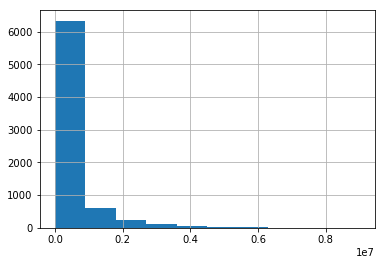

Nonparametric skew:  0.409321675329
G1 skew:  3.04310538237
Fraction dead:  0.58857615894


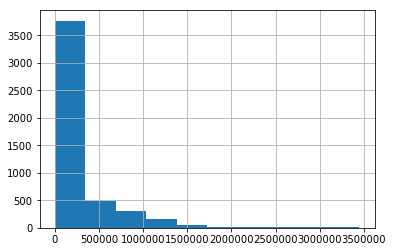

Nonparametric skew:  0.299237411087
G1 skew:  6.8126222851
Fraction dead:  0.616466376886


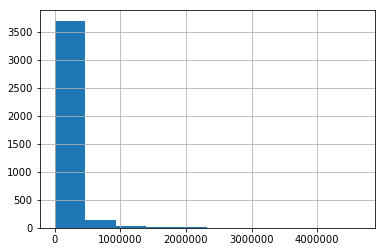

Nonparametric skew:  0.349512681602
G1 skew:  2.1275264666
Fraction dead:  0.19215513442


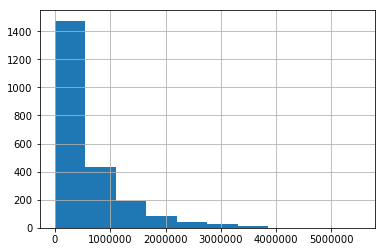

Nonparametric skew:  0.293085070741
G1 skew:  1.52358274448
Fraction dead:  0.408842105263


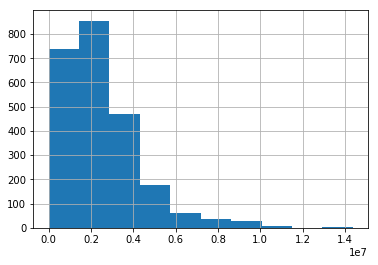

Nonparametric skew:  0.32181056128
G1 skew:  4.2884505591
Fraction dead:  0.367819148936


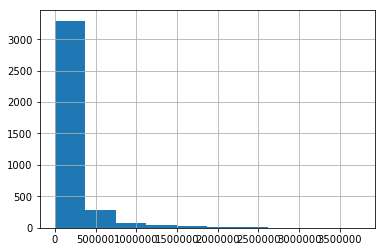

Nonparametric skew:  0.173076716367
G1 skew:  14.0405736443
Fraction dead:  0.943387930087


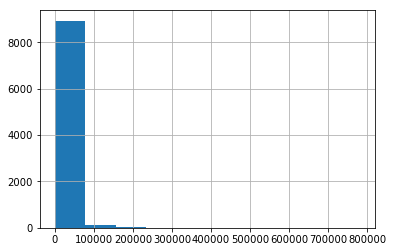

Nonparametric skew:  0.270097362767
G1 skew:  8.14759533338
Fraction dead:  0.816402294971


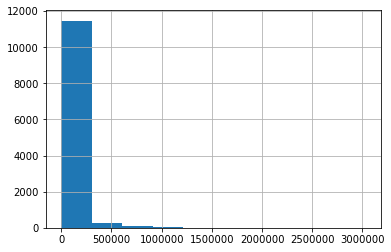

Nonparametric skew:  nan
G1 skew:  nan
Fraction dead:  0.0461538461538


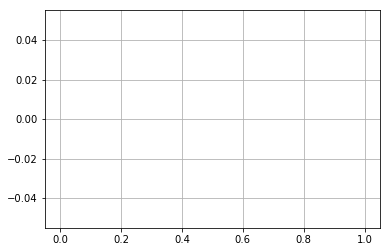

Nonparametric skew:  0.398848225453
G1 skew:  3.55381312956
Fraction dead:  0.566306027821


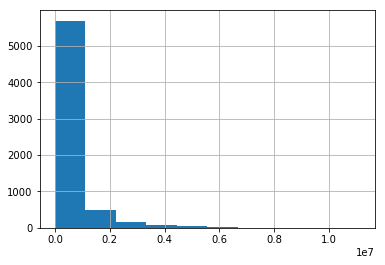

Nonparametric skew:  0.384486780654
G1 skew:  5.03460499793
Fraction dead:  0.643512724239


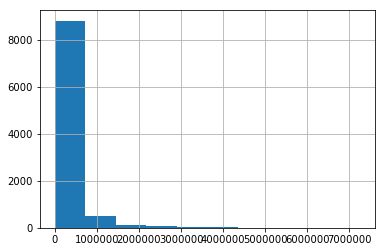

Nonparametric skew:  nan
G1 skew:  nan
Fraction dead:  0.0


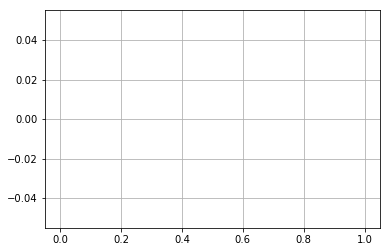

Nonparametric skew:  0.165078622656
G1 skew:  20.1332708374
Fraction dead:  0.941271018793


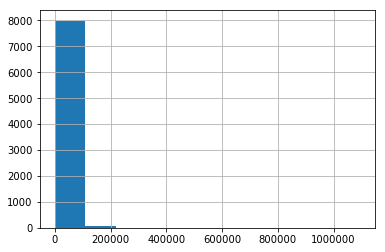

Nonparametric skew:  0.315245326041
G1 skew:  5.08590813178
Fraction dead:  0.0


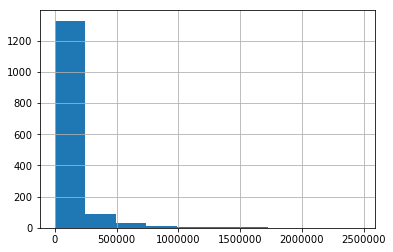

Nonparametric skew:  nan
G1 skew:  nan
Fraction dead:  0.0992217898833


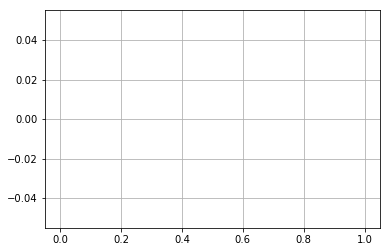

Nonparametric skew:  0.25961980449
G1 skew:  9.76636916577
Fraction dead:  0.794830042744


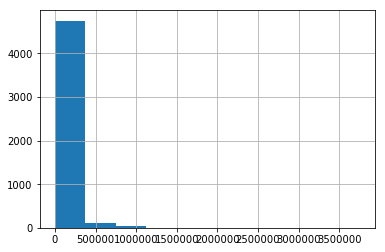

Nonparametric skew:  0.329988032876
G1 skew:  5.06733893233
Fraction dead:  0.583333333333


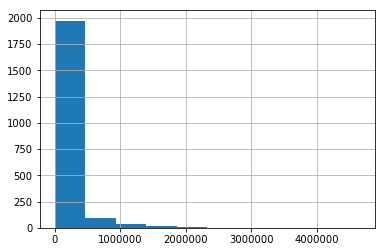

Nonparametric skew:  0.243199292337
G1 skew:  1.50270201757
Fraction dead:  0.229084783829


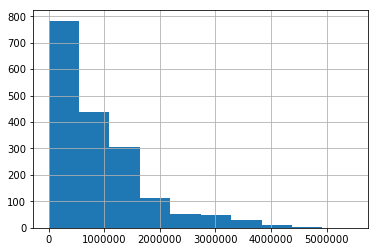

Nonparametric skew:  0.278859814687
G1 skew:  1.59677536314
Fraction dead:  0.41167953668


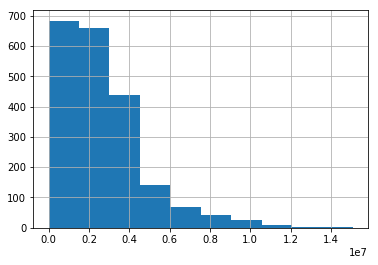

Nonparametric skew:  0.308264272667
G1 skew:  5.20025896769
Fraction dead:  0.584127874369


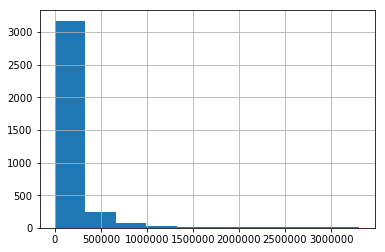

Nonparametric skew:  0.291077823587
G1 skew:  5.9323768901
Fraction dead:  0.0


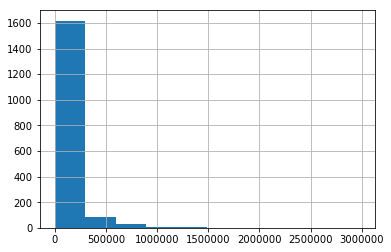

Nonparametric skew:  0.410424837551
G1 skew:  2.54591931824
Fraction dead:  0.357083906465


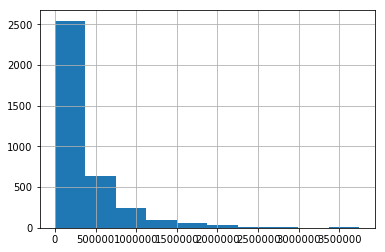

Nonparametric skew:  0.248986856022
G1 skew:  8.52460444931
Fraction dead:  0.929351583022


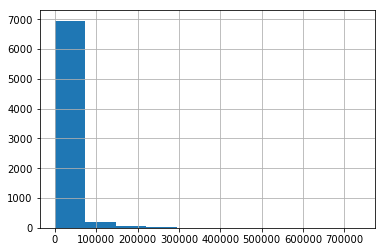

Nonparametric skew:  0.400590609817
G1 skew:  4.77890801958
Fraction dead:  0.613337030362


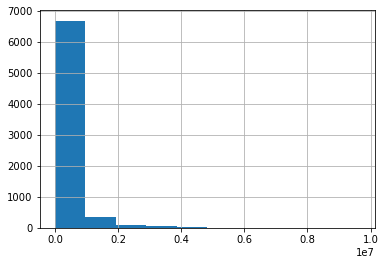

Nonparametric skew:  0.296855127001
G1 skew:  1.57353657104
Fraction dead:  0.407697325506


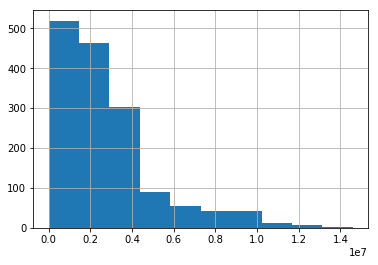

Nonparametric skew:  0.41427625451
G1 skew:  3.11563336963
Fraction dead:  0.579947819605


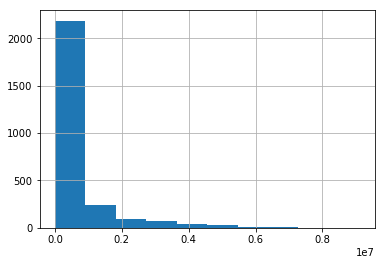

Nonparametric skew:  nan
G1 skew:  nan
Fraction dead:  0.0673076923077


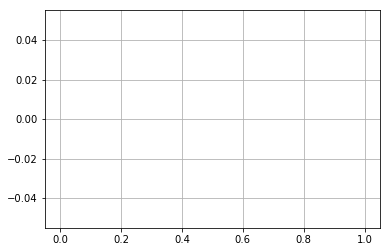

Nonparametric skew:  0.494063958633
G1 skew:  2.26597990599
Fraction dead:  0.575333333333


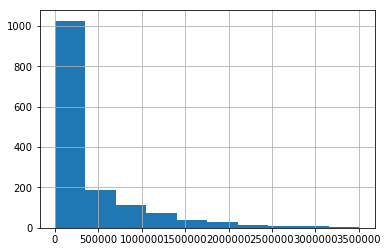

Nonparametric skew:  0.403420556741
G1 skew:  4.10559538826
Fraction dead:  0.610622710623


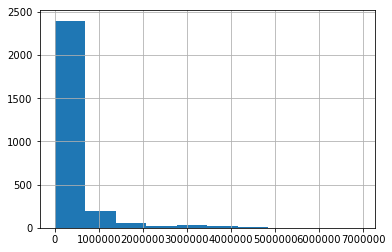

Nonparametric skew:  0.283148523411
G1 skew:  6.7041416305
Fraction dead:  0.801343850424


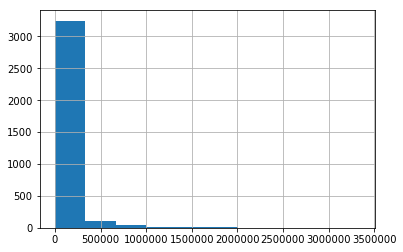

In [53]:
for race in leagues_df['id'].iloc[-30:]:
    race_experience = get_race_experience(race, ladders_df)
    if not race_experience.empty:
        print('Nonparametric skew: ', calc_nonparametric_skew(race_experience))
        print('G1 skew: ', race_experience.skew())
        print('Fraction dead: ', get_frac_dead(race, ladders_df))
        race_experience.hist()
        plt.show()

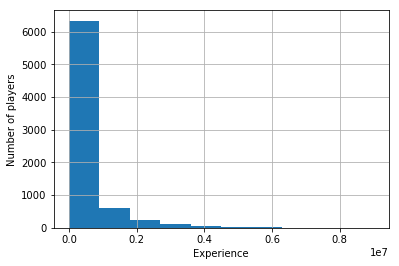

In [54]:
get_race_experience(leagues_df['id'].iloc[-30], ladders_df).hist()
plt.ylabel('Number of players')
plt.xlabel('Experience')
#plt.savefig('../figures/poe_experience_example.png', dpi=300)

As you would expect the fraction of characters that died before the race ended is correlated with higher (G1) skew. I also tried the easier to intepret nonparametric skew, but it doesn't seem as well correlated with what I would describe as a "difficult" race looking at the experience histogram. Going forward we'll use the standard G1 skew a.k.a. the adjusted Fisher-Pearson standardized moment coefficient.

Let's look at the most difficult races.

In [55]:
def get_race_skews(ladders_df):
    return ladders_df.groupby('id')['experience'].skew()

In [56]:
race_skews = get_race_skews(ladders_df)
race_skews.sort(ascending = False)
race_skews.dropna()

/Users/steve/anaconda/envs/pathofexile_analysis/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


id
Void                                38.489430
6 Hour Cutthroat (C01E006)          24.641083
48 Hour Cutthroat (C01E010)         24.050988
12 Hour Cutthroat (C01E005)         20.607926
3 Day Exiles Event HC (IC010)       20.289373
1h BLAMT Party (FRW017)             20.133271
1 Week Cutthroat (IV008)            19.344031
5 Hour Cutthroat Party (S03F119)    16.439814
2h BLAMT Party (MDC056)             16.046994
1 Hour FBLAMT Party (S06F169)       15.788544
2h BLAMT Party (MDC117)             15.630826
1h BLAMT Party (FRW011)             14.040574
1h BLAMT Party (ERW011)             13.756645
SG_Void                             13.668209
4 Hour Cutthroat (C01E004)          13.176868
6 Hour Cutthroat (C01E008)          12.994884
3 Hour Cutthroat (C01E003)          12.877636
135M Lethal Rogue Solo (S03F124)    12.583898
SG_Invasion                         11.946815
24 Hour Endless Ledge (I018)        11.919397
1 Hr Exiles Everywhere (S10C013)    11.658561
1 Hr Exiles Everywhere (S07F070

The top league is the Void league. Certain races allow characters access to rare items or currencies at a much higher rate than normal (e.g. Descent races take place in a dungeon completely separate from the main game with different drop rates). Since moving these character's into the normal league would upset game balance, these are moved into a special Void league. Once characters are in the Void league they can only be viewed, not played. Since it is populated with characters from the most "broken" leagues which can snowball (and from races with different time lengths), it makes sense that it would be highly skewed.

Cutthroat centers around killing other players for loot and experience. Not surprisingly most characters get killed at low levels while some snowball by coming out on top early.

The 3 Day Exiles Event HC  is the deadly exiles everywhere race discussed earlier.

BLAMT is a perennial masochistic race the stands for **B**lood magic, **L**ethal, **A**ncestral, **M**ulti-projectile, **T**urbo. This means characters use health instead of mana for skills, monsters do 50% extra normal damage and 50% normal damage as each element, there are many more enemey buff totems, enemies fire four additional projectiles, _and_ monsters move, cast, and attack 60% faster.

In contrast Burst races have no modifiers and the objective is to get as much experience as possible in the time limit. It makes sense that there is a lot less skew in experience for a 12 minute Burst race.

Add skew column to leagues_df

In [57]:
leagues_df['skew'] = get_race_skews(ladders_df)

### Add race type to leagues_df

In [58]:
for race_type in ['BLAMT', 'Cutthroat', 'Burst', 'Exiles', 'Ledge', 'Headhunter', 'Turbo', 'Lethal']:
    leagues_df.loc[leagues_df['id'].str.contains(race_type), 'race_type'] = race_type

In [59]:
for race_type in ['BLAMT', 'Cutthroat', 'Burst', 'Exiles', 'Ledge']:
    race_skews= leagues_df[leagues_df['race_type'] == race_type]['skew']
    skew_median = race_skews.median()
    skew_std = race_skews.std()
    skew_10_quantile = race_skews.quantile(q=0.1)
    skew_90_quantile = race_skews.quantile(q=0.9)
    print(race_type, " median experience skew: ", skew_median)
    print(race_type, " standard deviation of experience skew: ", skew_std)
    print(race_type, " 10% quantile of experience skew: ", skew_10_quantile)
    print(race_type, " 90% quantile of experience skew: ", skew_90_quantile)

BLAMT  median experience skew:  6.431815483900911
BLAMT  standard deviation of experience skew:  3.12476943322
BLAMT  10% quantile of experience skew:  2.957593871577662
BLAMT  90% quantile of experience skew:  9.49766011732509
Cutthroat  median experience skew:  5.360279284418884
Cutthroat  standard deviation of experience skew:  5.08191475066
Cutthroat  10% quantile of experience skew:  3.5406595462338872
Cutthroat  90% quantile of experience skew:  13.031280896313234
Burst  median experience skew:  0.7912846868081198
Burst  standard deviation of experience skew:  0.46615189636
Burst  10% quantile of experience skew:  0.479967673305963
Burst  90% quantile of experience skew:  1.375217637291906
Exiles  median experience skew:  6.991301981908414
Exiles  standard deviation of experience skew:  2.90380502184
Exiles  10% quantile of experience skew:  3.7728669318405568
Exiles  90% quantile of experience skew:  9.766322096379687
Ledge  median experience skew:  2.949016105845689
Ledge  stan

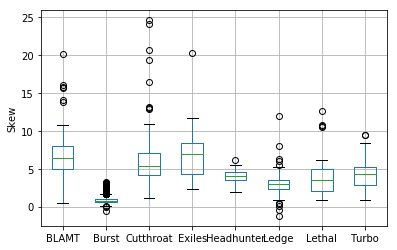

In [60]:
leagues_df.boxplot(column='skew', by='race_type')
plt.title('')
plt.suptitle('')
plt.ylabel('Skew')
plt.xlabel('')

In [61]:
# From http://deparkes.co.uk/2016/11/04/sort-pandas-boxplot/
def boxplot_sorted(df, by, column, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes")

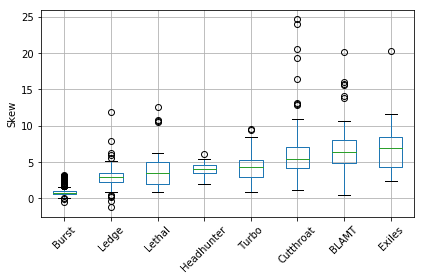

In [62]:
boxplot_sorted(leagues_df, column='skew', by='race_type', rot=45)
plt.title('')
plt.suptitle('')
plt.ylabel('Skew')
plt.xlabel('')
plt.savefig('')
plt.tight_layout()
#plt.savefig('../figures/poe_race_difficulty.png', dpi=300)

Below is some temp work seeing how hard it would be to do NLP for the races:

In [63]:
league_word_set = set()
for league_string in leagues_df['id'].values:
    league_word_set = league_word_set.union(set(league_string.split()))

In [64]:
clean_word_set = league_word_set.copy()
print(clean_word_set)
for word in league_word_set:
    if '(' in word:
        clean_word_set.remove(word)

{'(STV064)', '(MDS087b)', '(S08C122)', '(WHV003)', '(S06F126A)', '(PS4)', '12m', '(MDS028)', '(S02E138)', '(S02E091)', '(S04C004A)', '(S06C160)', '(S04F078)', '(S02F061B)', '(WHV135)', '2h', '(S09V078)', 'Lethal', '(S05C131)', '(WHV088)', 'Sd', '(STV088)', '(S06F075C)', '(S07S169)', '(S10C085C)', '(S04C063C)', '(S05F164)', '(S03F008)', '(S09C114)', '(WHC057A)', '(BGV053)', '(S09C099C)', '(S05C042)', 'LI', '(S02E110)', '(S10C117)', '(SP6C006B)', '(S02F134C)', '(WHS005)', '(S05F106C)', '(MDC101)', '(S07C186)', '(BGV076)', '(STC040)', '(S03D118)', 'SG_Warbands', '(WHV017)', '(S02F015C)', '(BGC109A)', '(S02C054)', '(S04C063A)', '(S07F061)', '(STV144)', 'без', '(S08C025)', '(S02E161)', '(S03D161)', '(S07S145)', '(IC009)', '(STC003)', '(I20)', '(S05F132)', '(C001A)', '(S09V048)', '(I016)', '(WHS076)', '(EWS045)', '(S11C069)', '(BGV026)', '(R004)', '(S02E197)', '(S09V069)', '(S05F025B)', '(WHC136C)', '(I31)', '(S02F082C)', '(S02F097)', '(S04F017)', '(S06S027)', 'Bloodgrip', 'SG_ne', '(WHC122C

In [65]:
clean_word_set

{'#1',
 '#2',
 '#3',
 '#4',
 '1',
 '1-hour',
 '10',
 '100',
 '105',
 '11',
 '12',
 '12M',
 '12m',
 '12м',
 '13',
 '135',
 '135M',
 '135Min',
 '135m',
 '14',
 '15',
 '150',
 '150M',
 '16',
 '17',
 '18',
 '19',
 '1Hr',
 '1h',
 '1ч',
 '2',
 '20',
 '200',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '2Hr',
 '2h',
 '2ч',
 '3',
 '30',
 '30m',
 '30м',
 '3Hr',
 '3h',
 '3ч',
 '4',
 '4)',
 '40m',
 '40м',
 '45',
 '45Min',
 '45м',
 '48',
 '5',
 '50',
 '50м',
 '6',
 '65m',
 '65м',
 '7',
 '75',
 '8',
 '85',
 '9',
 '90',
 '90M',
 '90Min',
 '90m',
 '90м',
 'A2TMP',
 'A3',
 'A6',
 'AF',
 'AI',
 'AR',
 'Abandoned',
 'Act',
 'Alt',
 'Ambush',
 'Anarchy',
 'Ances',
 'Ancestr',
 'Ancestral',
 'Ancstrl',
 'Apr14',
 'Arctic',
 'Aug',
 'BLAMT',
 'BLMST',
 'BM',
 'Beyond',
 'Blood',
 'Bloodgrip',
 'Bloodlines',
 'Boss',
 'Breach',
 'BroTeam',
 'Brutal',
 'Brutus',
 'Burst',
 'CT',
 'Champions',
 'Charity',
 'Cut-throat',
 'Cut-throat1',
 'Cut-throat2',
 'Cut-throat3',
 'Cut-throat4',
 'Cut-throat5'

In [66]:
conn.close()